> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::

# Algoritmos de búsqueda


$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $



In [1]:
%run ../macro_tQ.py
import sys
sys.path.append('../')
import macro_tQ as tQ

## Una aguja en un pajar 

**Promesa:** disponemos de un *oráculo* que implementa una función $f: x\to f(x) =  0,1$ donde $x \in S_n = 0,1,..., 2^{n-1}$, con la siguiente propiedad: existe un único valor $x = w$ tal que 

$$
f (x) = \left\{ 
\begin{array}{rcl} 1 &\hbox{si} & x = w\\ 0 &\hbox{si} & x \neq w \end{array} \right.
$$

**Reto:** descubrir $w$ con el mínimo número de consultas al oráculo. 


En el peor de los casos, el proceso es análogo al de buscar una aguja en un pajar, o el nombre de un cliente de la guía telefónica asociado a un número concreto. La función $f(x)$ es la función *comparar con un patrón solución* que da 1 sólo cuando se acierta. También puede tratarse de una función que da 1 cuando $w$ es la solución de algún problema algebráico de fácil verificación (por ejemplo un sudoku). 

Si $N = 2^N$ es la cardinalidad de la base de datos, el algoritmos de Grover permite efectuar esta tarea en un número de pasos que crece como   ${\cal O}(\sqrt{N})$.

La ganancia por tanto, no es exponencial, como en el caso de la transformada de Fourier cuántica. De hecho, no es fácil saber *a priori* si un algoritmo va a tener una ganancia exponencial o no.

### El plano de Grover

Nuestra *base de datos* $x\in S_n$ se convierte en la *base computacional* de $n$ cúbits, $\{\ket{x}\}$.
La *aguja en el pajar* que queremos encontrar será, ahora, un cierto vector $\ket{w}$, tal que

$$
U_f \ket{x}\ket{0} = \left\{ 
\begin{array}{rcl} \ket{x}\ket{1} &\hbox{si} & x = w\\ \ket{x}\ket{0} &\hbox{si} & x \neq w \end{array} \right.
$$

Aquí $U_f$ será el  <i>oráculo booleano</i>  asociado a la función de búsqueda




::::::{admonition} Nota
:class: note

    
La implementación de esta función es trivial porque sólo contiene un <i>min-term</i> $f(x=w)=1$. Por supuesto, este es desconocido para el usuario del oráculo. 
    También podemos implementar esta función como un <i>oráculo de fase</i>, preparando la ancilla en el estado $\ket{-}$

$$
U_f \ket{x}\ket{-} = (-1)^{f(x)}\ket{x}\ket{-} ~= ~ \left\{ \begin{array}{lcc}
             -\ket{x}\ket{-} &   \hbox{si}  & x = w \\ \rule{0mm}{6mm}
              \, ~~\ket{x}\ket{-} &  \hbox{si} & x \neq w \end{array}
   \right..
$$

En resumen cada reflexión $U_f$ es equivalente a una consulta al oráculo.
    
::::::


Como de costumbre, la estrategia cuántica comienza introduciendo  una superposición uniforme de elementos de la base

\begin{equation*}
\ket{s} = H^{\otimes n}\ket{0} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \ket{x}
\end{equation*}

Definamos el vector unitario compuesto por la *superposición uniforme* de los elementos que **no son solución**

$$\ket{s^{\prime}} = \frac{1}{\sqrt{N-1}} \sum_{x \neq w} \ket{x}$$

Claramente $\braket{\omega}{s'} = 0$ son ortogonales. Ahora podemos reescribir $\ket{s}$ en una forma más conveniente


\begin{eqnarray*}
\ket{s} = \frac{1}{\sqrt{N}}\sum_x \ket{x}  ~&=& ~
 \frac{1}{\sqrt{N}}\left(\ket{w} + \sum_{x \neq w} \ket{x} \right) 
\end{eqnarray*}

Si ahora definimos el vector unitario
$$
\ket{s'} = \frac{1}{\sqrt{N-1}}\sum_{x \neq w} \ket{x} 
$$

podemos escribir el resultado en la forma siguiente

\begin{eqnarray*}
\ket{s} =  \frac{1}{\sqrt{N}} \ket{w} + \sqrt{\frac{N-1}{N}} \ket{s^\prime}.
\end{eqnarray*}



Eso quiere decir que: 
- podemos pensar  en un subespacio de dimensión 2 (un *plano*) formado por los dos vectores $\{\ket{w},\ket{s'}\}$


- en ese plano, nuestro estado $\ket{s}$ es  un vector 

$$\ket{s} = \sin{\theta}\ket{w} + \cos{\theta}\ket{s^\prime}$$

  caracterizado por el ángulo $\sin\theta = \frac{1}{\sqrt{N}}$, como se puede observar en la figura siguiente


::::{figure} ./figuras/Grover1.png
:width: 650px
:align: center
::::


::::::{admonition} Notar
:class: note


-  el ángulo disminuye con el tamaño $N$ de la base de datos. Este ángulo es la amplitud de probabilidad de encontrar la solución $w$ después de una medida de $\ket{s}$.

    
- Para $N\to \infty$ tenemos que $\theta \sim 1/\sqrt{N}$
::::::


### Rotación de Grover

La estrategia se basa en iterar una serie de operaciones que tengan como efecto una amplificación de la probabilidad de obtener el estado $\ket{w}$.


Geométricamente, cada *iteración de Grover* es una composición de dos reflectores $G = R_{s_\perp} R_w$, donde

-  **el marcador**, $R_w$, produce una *reflexión paralela* a  $\ket{w}$. 

Es decir, invierte la componente asociada a $\ket{w}$ y mantiene intactas todas las demás.
Un operador así tiene la siguiente forma

$$
R_w  =  \left( I - 2\ket{w}\bra{w}\rule{0mm}{6mm}\right)
$$

Efectivamente, operando se llega inmediatamente a

$$
R_w\ket{s} ~=~ \left( I - 2\ket{w}\bra{w}\rule{0mm}{6mm}\right)\ket{s} ~=~  \ket{s} - \frac{2}{\sqrt{N}}\ket{w} = 
~ = ~ -\frac{1}{\sqrt{N}} \ket{w} + \sqrt{\frac{N-1}{N}} \ket{s^\prime}
$$



::::{figure} ./figuras/Grover2.png
:width: 600px
:align: center

::::



-   **el difusor**, $R_{s_\perp}$ es también un reflector. 

Esta vez, $R_{s_\perp}$ produce una reflexión a lo largo de un vector $\ket{s_\perp}$, perpendicular a $\ket{s}$.  Como hemos visto, el operador es 

$$
R_{s_\perp} =  I - 2\ket{s_\perp}\bra{s_\perp}  
$$


::::{figure} ./figuras/Grover3.png
:width: 650px
:align: center
::::


En las ilustraciones hemos representado el efecto de una primera iteración de Grover $G = R_{s_\perp} R_w$ actuando sobre el vector $\ket{s}$. 


Observamos que: 

- el vector resultante sufre una rotación de ángulo $2\theta$ en el  plano $\{\ket{w},\ket{s'}\}$. 

- este hecho no depende de cómo sea $\ket{s}$, por tanto: es cierto *para cada iteración* $G$ de Grover.



- la amplitud del estado $\ket{w}$ aumenta a expensas de las amplitudes de los demás estados.


### El circuito de Grover

La tarea ahora es crear sendos circuitos que implementen las reflexiones $R_w$ y $R_s$.
Comenzaremos repasando la prescripción general para programar estos operadores.

::::::{card} 
<b>Lema</b>:  

^^^

Sea $\ket{\psi}$ un vector <i>preparable</i> en la forma  $\ket{\psi} = V\ket{0}$. El reflector paralelo a $\ket{\psi}$ es


$$
R_\psi = I - 2\ket{\psi}\bra{\psi} = V \left( I - 2\ket{0}\bra{0}\rule{0mm}{6mm} \right) V^\dagger = V R_0 V^\dagger
$$
::::::


De modo que sólo necesitamos un circuito para el reflector  $~R_0 = I- 2\ket{0}\bra{0}~$ a lo largo del estado $\ket{0}$.

::::::{card} 
<b>Lema</b>:  

^^^

El siguiente circuito  implementa la acción del  <i>reflector</i> 


$$~~R_0 ~=~ I- 2\ket{0}\bra{0} ~=~ \sum_{x\neq 0}\ket{x}\bra{x}-\ket{0}\bra{0}$$    

::::{figure} ./figuras/Reflection0.PNG
:width: 200px
:align: center

::::


donde la cadena $XZX$ puede situarse en cualquier cúbit, no necesariamente el último. 

::::::

Es evidente que cualquier estado que no sea $\ket{00...0}$ pasará intacto por el circuito. El estado $\ket{00...0}$ activa la puera $Z\ket{1} = -\ket{1}$ en el último cúbit. Ese signo es el que estamos buscando.

In [2]:
from qiskit.circuit.library import ZGate
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit

def R0(n):    
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    qc.x(n-1)
    qc.append(ZGate().control(n-1,ctrl_state= 0),qr)
    qc.x(n-1)
    qcR0 =  qc.to_gate()
    qcR0.name = 'R0'
    return qcR0

/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


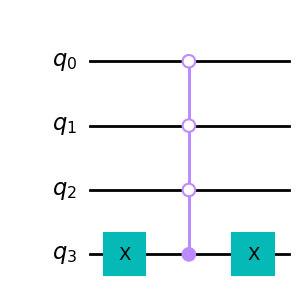

In [3]:
R0(4).definition.draw('mpl')

#### Codificando el marcador $O = R_w$

Comenzando por $\ket{\psi} = \ket{w}$, el reflector $R_w$ es  un operador que depende del vector desconocido $\ket{w}$. Su acción es la reflexión

$$
R_w \ket{x}  ~= ~ \left\{ \begin{array}{lcc}
             -\ket{x}  &   \hbox{si}  & x = w \\ \rule{0mm}{6mm}
              \, ~~\ket{x}  &  \hbox{si} & x \neq w \end{array}
   \right.. 
$$

Pero esta es, precisamente la acción del oráculo asociado a $f(x)$, implementado como oráculo de fase. Por tanto no estámos usando información prohibida. La primera reflexión no es más que la invocación de oráculo.


In [4]:
def Rw(n,w):        
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    wstring = format(int(w), 'b').zfill(n)
    for i,wi in enumerate(reversed(wstring)):
        if wi == '1':
            qc.x(qr[i])
    qc.append(R0(n),qr)        
#    qc.append(ZGate().control(n-1,ctrl_state= 0),qr) # el reflector R0
    for i,wi in enumerate(reversed(wstring)):
        if wi == '1':
            qc.x(qr[i])
    qcRw =  qc.to_gate()
    qcRw.name='Rw'
    return qcRw


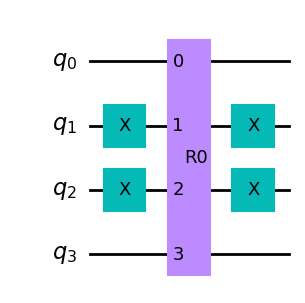

In [5]:
# Sobre un circuito de 4 cúbits, sea el estado w = 6 = 0110 

Rw(4,6).definition.draw('mpl')

#### Codificando el difusor $D = R_{s_\perp}$

Ahora el papel de $\ket{\psi}$ lo jugará el vector perpendicular $\ket{s_\perp}$. Pero ¡no sabemos preparar este estado! 

Sin embargo es evidente que $ R_{s_\perp} R_{s} = -I$ porque el producto de reflexiones paralela y perpendicular a un vector acaba invirtiendo todas las componentes. Dicho de otra manera  $R_{s_\perp} = - R_s$. Y para $\ket{s}$ si que tenemos una preparación $\ket{s} = H^n\ket{0}$. 

Por tanto, si elegimos codificar el reflector $R_s$ en lugar de $R_{s_\perp}$ sólo estaremos cometiendo un error en un signo. A priori los signos globales son inobservables. Por tanto esperamos que no habrá ninguna diferencia entre usar un reflector  u otro.


In [6]:
def Rs(n):        
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    qc.h(qr)
    qc.append(R0(n),qr)
    qc.h(qr)
    qcRs = qc.to_gate()
    qcRs.name='Rs'
    return qcRs

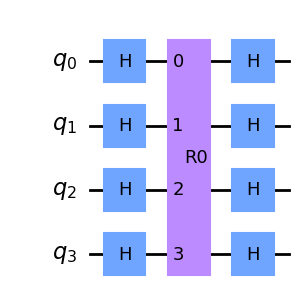

In [7]:
Rs(4).definition.draw('mpl')

Con estos dos ingredientes ya podríamos fabricar el operador de Grover. 

$$
 G = D \, O = R_{s_\perp}  R_w = R_{s_\perp} R_w
$$

Sin embargo, como hemos dicho, no sabemos implementar $R_s$. Con lo que sabemos hacer, sólo podemos implementar el opuesto del operador de Grover 

$$
R_s R_w = - G
$$


::::{figure} ./figuras/Grover5.png
:width: 600px
:align: center

::::



In [8]:

def G(n,w):                    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 

    qc.append(Rw(n,w),qr)
    qc.append(Rs(n),qr)
    
    qcG=qc.to_gate()
    qcG.name='-G'
    return qcG


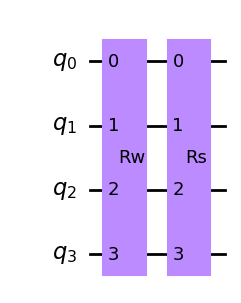

In [9]:
G(4,6).definition.draw('mpl')

#### El circuito de Grover

Finalmente podemos componer el circuito, que contiene la solución $w$ como argumento de $G$

0110


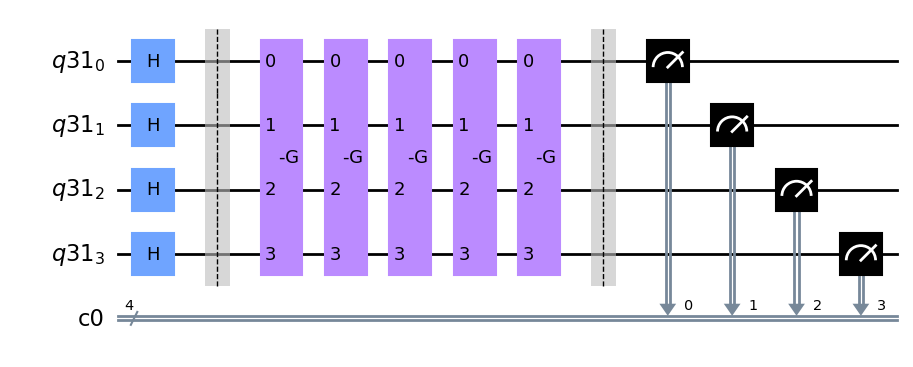

In [10]:
# el número de cúbits de la base de datos
n=4
# el número de iteraciones de Grover
niter = 5
# la solución oculta en decimal y en binario
w = 6
wstring = format(int(w), 'b').zfill(n)
print(wstring)

# el circuito de Grover
qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qcGrover = QuantumCircuit(qr,cr)
qcGrover.h(qr)
qcGrover.barrier()

for i in range(niter):
    qcGrover.append(G(n,w),qr)

qcGrover.barrier()

# medimos el resultado
qcGrover.measure(qr,cr)
qcGrover.draw('mpl')

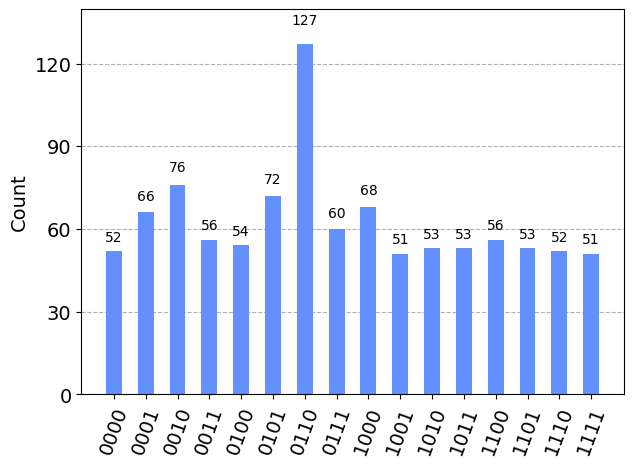

In [11]:
'ejecutamos el circuito'
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

nshots = 1000
dist = Sampler().run(qcGrover,shots=nshots).result().quasi_dists[0]
counts = tQ.dist2counts(dist,n,nshots)

plot_histogram(counts)

### La rotación óptima

Se sigue de la figura que ilustra la acción de $G$ que cada iteración de  produce una rotación de ángulo $2\theta$ donde $\theta = \arcsin 1/\sqrt{N}$ es el ángulo inicial

\begin{eqnarray*}
\ket{s} &=&  \sin \theta \ket{w} + \cos  \theta \ket{s'} \nonumber\\ \rule{0mm}{5mm}
G \ket{s} &=& \sin 3\theta \ket{w} + \cos 3 \theta \ket{s'}\\ \rule{0mm}{5mm}
G^2 \ket{s} &=& \sin 5\theta \ket{w} + \cos 5 \theta \ket{s'}\\\rule{0mm}{5mm}
\vdots
\end{eqnarray*}

Esta rotación puede representarse en la forma de una matriz

$$
G\ket{s} = G\begin{bmatrix}\sin\theta \\ \cos\theta\end{bmatrix} = \begin{bmatrix} \sin 2\theta & \cos 2 \theta \\ - \cos 2\theta & \sin 2\theta \end{bmatrix} \begin{bmatrix}\sin\theta \\ \cos\theta \end{bmatrix} =
\begin{bmatrix}\sin 3 \theta \\ \cos3\theta \end{bmatrix}
$$

La iteración del circuito de Grover conduce a una sucesión de vectores

$$
G^k\ket{s} = \begin{bmatrix} \sin 2k\theta & \cos 2k \theta \\ - \cos 2k\theta & \sin 2k\theta \end{bmatrix} \begin{bmatrix}\sin\theta \\ \cos\theta \end{bmatrix} = \begin{bmatrix}\sin(2k+1)\theta  \\
\cos(2k+1)\theta \end{bmatrix}
$$
que giran *sin salirse* del plano $(\ket{w},\ket{s'})$

Esta rotación comienza aumentanto la amplitud del estado $\ket{w}$ ya que $\sin 3\theta > \sin \theta$. Éste es el efecto de *amplificación de amplitud* buscado

Habrá un valor de $k$ para el cuál la iteración se aproxime mucho al valor $\sin (2k+1)\theta \approx 1$. 

Valores de $k$ superiores conducen a una supresión de dicha amplitud al rotar el vector $G^k\ket{s}$ alejándose del eje $\ket{w}$.

Por para conocer el número óptimo de iteraciones, debemos solucionar  la ecuación de *máxima amplitud*

$$
\sin (2k+1)\theta) = 1
$$

- Esta ecuación tendría fácil solución 

$$
(2k+1)\theta)  = \frac{\pi}{2} ~~~~\Rightarrow ~~~~ k = \frac{\pi}{4\theta} - \frac{1}{2}
$$
   si $k$ fuese un número real. 
   
   
- Pero es un número entero $ \Rightarrow $ el siguiente teorema da la **solución óptima**

::::::{card} 
<b>Teorema</b>:  

^^^

El valor entero de $k\in{\mathbb Z}$ que maximiza la probabilidad $P_k = \sin^2((2k+1)\theta)$ de medir la solución $w$  es la parte entera 
 

$$
k_{op} = \left[ \frac{\pi}{4\theta} \right]
$$

 donde $\theta = \arcsin \sqrt{\frac{1}{N}}$.
$~$Se cumple en este caso que:

$$
1 - \frac{1}{N} \leq P_{k_{op}} \leq 1\, .
$$
::::::


::::::{admonition} Ejercicio
:class: tip


Ejecuta el algoritmo de Grover variando el número <i>niter</i> de iteraciones de Grover y verifica que el valor de $k$ óptimo es el enunciado en el teorema.
::::::


Cuando $N\to \infty$, es decir, cuando nuestra base de datos es muy grande 
el vector inicial tiene un ángulo muy pequeño. 

$$
\theta = \arcsin \frac{1}{\sqrt{N}} \to \frac{1}{\sqrt{N}} - ....
$$

a orden más bajo en serie de potencias de $1/\sqrt{N}$


::::::{card} 
<b>Teorema</b>:  

^^^

En el límite  de $N\to\infty$ el tiempo que necesita el algoritmo de Grover para aproximarse 
máximamente a la solución crece como 


$$
k_{op} \approx \frac{\pi}{4}\sqrt{N}
$$
::::::


Esto supone un crecimiento $\mathcal{O}(\sqrt{N})$ en lugar de $\mathcal{O}(N)$ que es lo que esperaríamos clásicamente. 


## Varias agujas en un pajar 

Un usuario podría tener más de una línea telefónica contratada. En ese caso, *varios* números de teléfono servirán para dar con *un sólo* nombre.
Supondremos ahora que la búsqueda en la base de datos admite $M$ resultados satisfactorios distintos $w_1,....,w_M$.

Ahora los $M$ vectores de la base que *son solución* $\{\ket{w_i} \}$ generan un *subespacio* $\mathcal{B} \subset \mathcal{H}$ de dimension $M$.  

Podemos descomponer $~\Hil = {\cal B} \oplus {\cal B}_\perp$ en suma directa de subespacios *solución* y su ortogonal.
Un vector $\ket{x}\notin {\cal B}~$ será $~\ket{x} \in {\cal B}_\perp$.
Definamos

\begin{equation*}
\ket{w} = \frac{1}{\sqrt{M}}\sum_{x\in \mathcal{B}}\ket{x} = \frac{1}{\sqrt{M}}\sum_i^M \ket{w_i} \in {\cal B}
~~~~~~~,~~~~~~~~
\ket{s^\prime} = \frac{1}{\sqrt{N-M}}\sum_{x \in \mathcal{B}_\perp}\ket{x} \in {\cal B}_\perp
\end{equation*}

El vector inicial se puede descomponer en suma de sus componentes *a lo largo* de ${\cal B}$ y de ${\cal B}_\perp$


\begin{eqnarray*}
\ket{s} = \frac{1}{\sqrt{N}} \sum_{x\in \Hil} \ket{x} 
&=&  \frac{1}{\sqrt{N}} \sum_{x\in {\cal B}} \ket{x}
 +  \frac{1}{\sqrt{N}} \sum_{x\in {\cal B}_\perp} \ket{x}
\\ \rule{0mm}{12mm}
&=&\sqrt{\frac{M}{N}}\ket{w} + \sqrt{\frac{N-M}{N}}\ket{s^\prime}.
\end{eqnarray*}


Con estas definiciones, las figuras en las que se representan las reflexiones son idénticas y todo ocurre en el *plano de Grover* generado por los vectores $\{\ket{w},\ket{s'}\}$.
La *única diferencia* está en el valor del ángulo inicial 

$$
\theta = \arcsin \sqrt{\frac{M}{N}}
$$





::::::{card} 
<b>Teorema</b>:  

^^^

El valor entero de $k\in{\mathbb Z}$ que maximiza la probabilidad $P_k = \sin^2 ((2k+1)\theta)$ de medir la solución $w$  es la parte entera de $\pi/4\theta$

    
$$
k_{op} = \left[ \frac{\pi}{4\theta} \right]
$$

 donde $\theta = \arcsin \sqrt{\frac{M}{N}}.~$
En este caso, la probabilidad de medir el estado $\ket{w}$ es

$$
1 - \frac{M}{N} \leq P_{k_{op}} \leq 1 \, .
$$
::::::

en el límite $N\to \infty$ el coste computacional crece aun como la raíz cuadrada

::::::{card} 
<b>Teorema</b>:  

^^^

En el límite  de $N\to\infty$ el tiempo que necesita el algoritmo de Grover para aproximarse 
máximamente a alguna de las soluciones $w_i$, crece como 


$$
k_{op} \approx \frac{\pi}{4}\sqrt{\frac{N}{M}}
$$
::::::

Vemos que el número de iteraciones que hay que realizar es menor. A cambio sólo obtendremos una solución $w_i$ después de cada ejecución.

### El circuito de Grover modificado 

El único operador que necesitamos modificar es $R_w$

In [12]:
def Rw(n,w_array): #w_array es una lista de enteros w_i en S_n  
            
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr) 
    
    for w in w_array:
        wstring = format(int(w), 'b').zfill(n)
        for i,wi in enumerate(reversed(wstring)):
            if wi == '1':
                qc.x(qr[i])
        qc.append(R0(n),qr)        
        for i,wi in enumerate(reversed(wstring)):
            if wi == '1':
                qc.x(qr[i])
    qcRw =  qc.to_gate()
    qcRw.name='Rw'
    return qcRw


Ahora podemos correr el mismo circuito con esta modificación.
Primero debemos calcular el valor óptimo de iteraciones $k_{op} = [\pi/(4 \arcsin \sqrt{M/N})]$


In [13]:
# dimensión de la base de datos
n=4
# lista de soluciones ocultas
w_array = [1, 3, 6, 7, 15]

# valor de k óptimo
k_op = int(np.pi/(4*np.arcsin(np.sqrt(len(w_array)/2**n))))
print('k_op =',k_op)

k_op = 1


Ahora construimos el circuito de Grover con $k_{op}$ iteraciones. 

w_i = ['0001', '0011', '0110', '0111', '1111']


/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


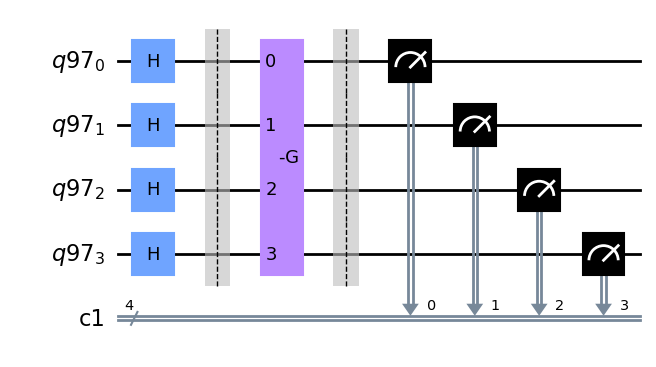

In [14]:
# pasamos las soluciones a cadenas binarias de n entradas
wstring = [format(int(w), 'b').zfill(n) for w in w_array]
print('w_i =',wstring)

qr = QuantumRegister(n)
cr = ClassicalRegister(n)
qcGrover = QuantumCircuit(qr,cr)
qcGrover.h(qr)
qcGrover.barrier()

for i in range(k_op):
    qcGrover.append(G(n,w_array),qr)

qcGrover.barrier()

qcGrover.measure(qr,cr)
qcGrover.draw('mpl')

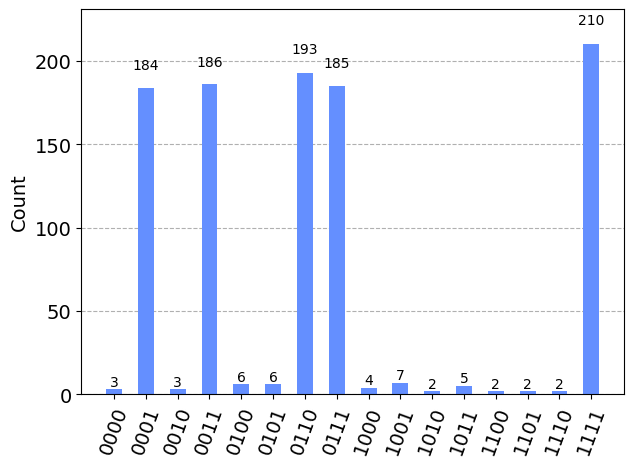

In [15]:
'ejecutamos el circuito'
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

nshots = 1000
dist = Sampler().run(qcGrover,shots=nshots).result().quasi_dists[0]
counts = tQ.dist2counts(dist,n,nshots)

plot_histogram(counts)

Extraemos los valores que han obtenido las máximas frecuencias de medida

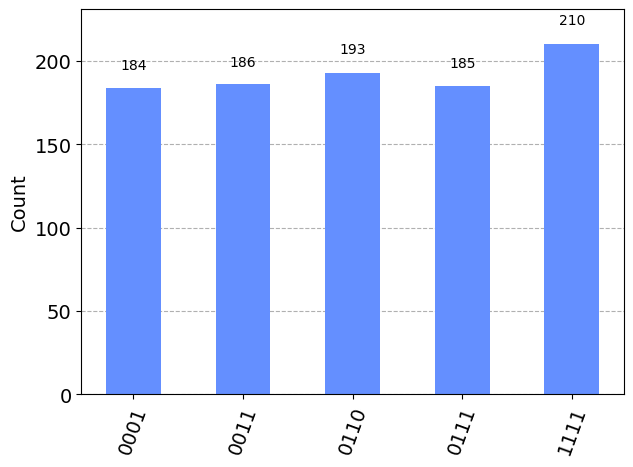

In [16]:
majority_counts = {k: v for k, v in counts.items() if  v>100 }
#print(projected_counts)
plot_histogram(majority_counts)

los convertimos a base decimal

In [17]:
wi_list = sorted([int(keys,2) for  keys in majority_counts]) 
print('{Ns} ~ ', wi_list)



{Ns} ~  [1, 3, 6, 7, 15]


## Contaje cuántico 

En el algoritmos de Grover es crucial saber cuántas iteracions $k$ del operador $G$ hay que realizar. 
En el caso de múltiples soluciones, esto depende de $M$. 
Pero ¡$M$ es desconocido de antemano! Por tanto, el algoritmo ve *comprometida su eficiencia*. 

En esta sección vamos a explicar **cómo deducir** $M$ como paso previo, invocando el algoritmo de Estimación de Fase Cuántica.

Ya hemos visto que, en la base $\{|\omega\rangle, |s'\rangle\}$, podemos escribir la iteración de Grover como la matriz de rotación

$$
G =
\begin{bmatrix}
\cos2\theta & \sin2\theta\\
-\sin2\theta & \cos2\theta
\end{bmatrix},
$$

donde 

$$
\theta = \arcsin M/N 
$$

Conocer  $\theta$ nos permitiría tener acceso al valor de $$ M  = N\sin\theta 
$$


Los  autovalores  y autoestados  de este operador son los siguientes

$$
 \left(e^{+ 2i\theta}, \begin{bmatrix}- i \\1 \end{bmatrix}\right)~~~~,~~~~ \left( e^{- 2i\theta}, \begin{bmatrix}+ i \\1 \end{bmatrix} \right)
$$ 

que están pidiendo *a gritos* el algoritmo QPE, de estimación cuántica de fase.


::::::{admonition} Ejercicio
:class: tip

prueba este resultado
::::::


### Una sutileza crucial

En su momento comentamos que el operador que codificamos en el circuito de Grover no es realmente $ R_{s_\perp}$, sino $R_s = -R_{s_\perp}$.
Por tanto, realmente estamos implementando la acción de $ R_s R_w =  -R_{s_\perp}R_w = -G  $.

Este signo global lo hemos despreciado en el algoritmo de Grover. Sin embargo, ahora, en la estimación de fase, ya no se trata de un signo global, al estar el operador controlado. Por tanto tenemos que tenerlo en cuenta. 
El operador $-G = G e^{i\pi}$ tiene por autovalores y autovectores

$$
 \left(e^{+ 2i\theta + i\pi}, \begin{bmatrix}- i \\1 \end{bmatrix}\right)~~~~,~~~~ \left( e^{- 2i\theta + i\pi}, \begin{bmatrix}+ i \\1 \end{bmatrix} \right)
$$ 

Vamos a definir las cantidades $\varphi_\pm$ relacionadas con los autovalores de $-G$

$$
 e^{\pm  2 i \theta + i\pi} \equiv e^{2\pi i \varphi_\pm} ~~~~\Rightarrow ~~~~ {\pm  2 i \theta + i\pi}  = {2\pi i \varphi_\pm} 
$$

El algoritmo de estimación de fase nos debería dar una aproximación buena a $\varphi_\pm$, y a partir de estos dos valores, a

$$
\theta = \pm (\pi \varphi_\pm - \pi/2)
$$


Vamos a insertar $(-G)^{2^k}$ en un circuito de estimación de fase cuántica con **$t$ cúbits de contaje**

::::{figure} ./figuras/ContajeCuantico.png
:width: 700px
:align: center
::::


A la salida de este circuito, el registro de phase, estará en una combinación de estados $\ket{x_+}$ y $\ket{x_-}$ donde $x_\pm$ están distribuidas en torno a los estimadores de orden $t$  para $ a_\pm = [\varphi_\pm]$ 

El operador $-G \in SU(2)$ puesto que su determinante es 1
Por tanto 

$$
e^{2\pi i\varphi_+} e^{2\pi i\varphi_-} = 1
$$

El algoritmo de estimación de fase nos dará estimaciones para $~~\varphi_+ = \varphi ~~$ , $~~\varphi_- = 1 - \varphi~,~~$ ambos pertenecientes al intervalo $[0,1)$.

En **ambos casos** es inmediato verificar que se cumple

$$
\frac{M}{N} \equiv \sin^2 \theta = \sin^2\left( \pi \varphi - \pi/2 \right) = \cos^2 (\pi\varphi) 
$$

A partir de aquí obtenemos 

$$
M = N \cos^2 (\pi \varphi) = N \cos^2 (\pi (1-\varphi)) 
$$

Para generar el circuito de QPE, tenemos que programar la puerta $-G^k$ *controlada*  $~\Rightarrow ~\cg{(-G)^{k}}$ 

In [18]:
def c_G(n,w_array,power): 
    qrG = QuantumRegister(n)
    qcG = QuantumCircuit(qrG) 

    for _ in range(power):
        qcG.append(G(n,w_array),qrG)
    
    c_mG=qcG.to_gate()
    c_mG.name="(-G)^%i" % power
    c_mG = c_mG.control()
    return c_mG


/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


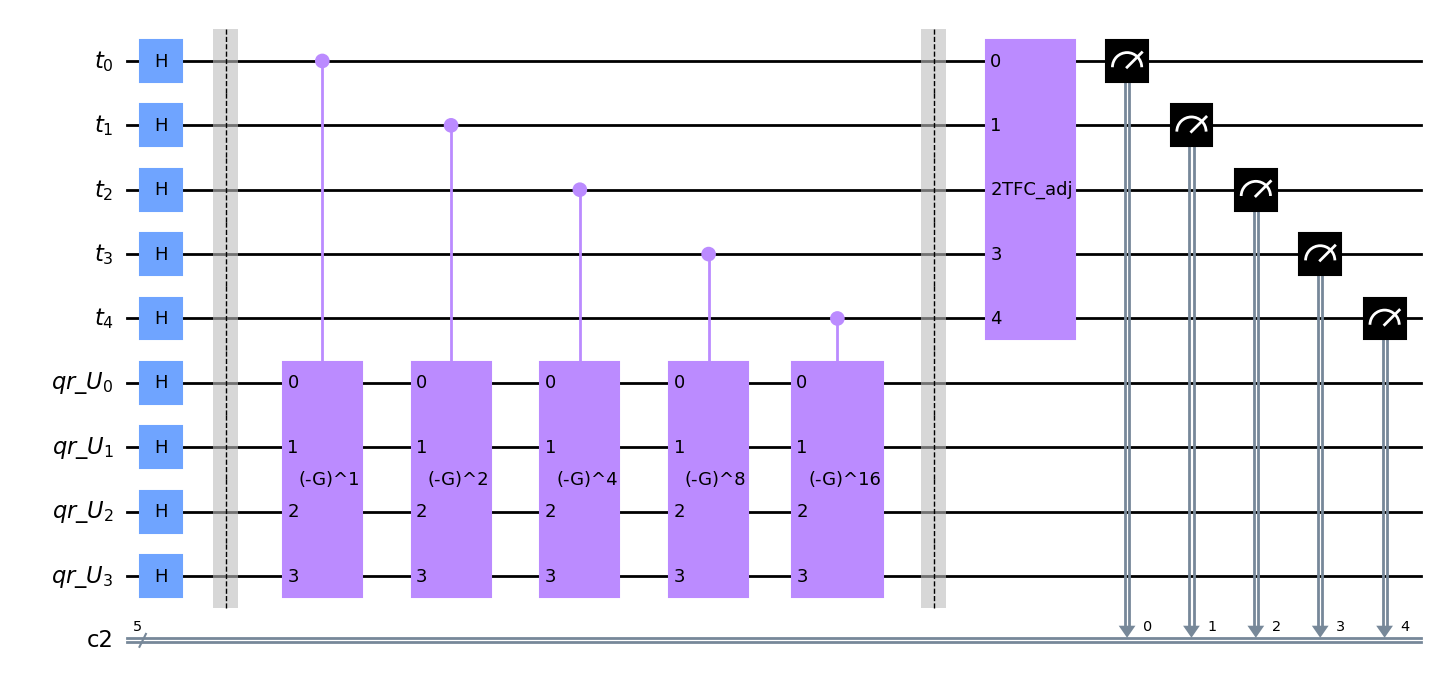

In [19]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 5 # la dimensión del registro de evaluación 
n = 4 

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)
qpe = QuantumCircuit(qrt,qra,crt)   

qpe.h(range(t+n))
qpe.barrier()

# aplicamos los operadores controlados c((-G)^(2^j))
for j in range(t):
    qpe.append(c_G(n,w_array,2**j),[qrt[j]]+qra[:])
    
qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(TFC_adj(t),qrt)

qpe.measure(qrt,crt)

qpe.draw(output="mpl")

Ejecutamos el circuito de estimación de fase

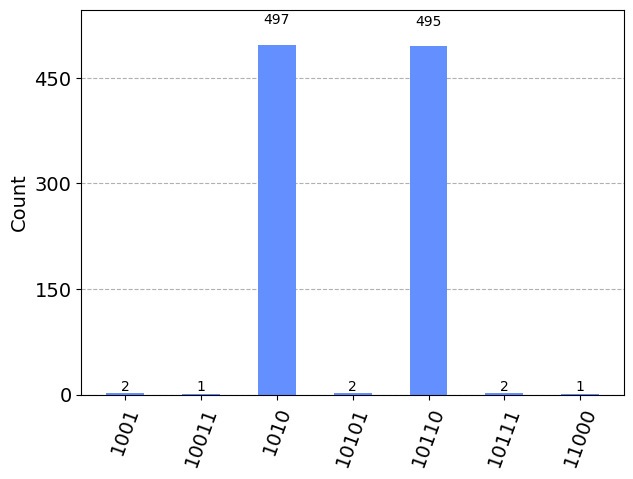

In [20]:
'ejecutamos el circuito'
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

nshots = 1000
dist = Sampler().run(qpe,shots=nshots).result().quasi_dists[0]
counts = tQ.dist2counts(dist,n,nshots)

plot_histogram(counts)

Extraemos las salidas $m_i$ que tienen máxima probabilidad

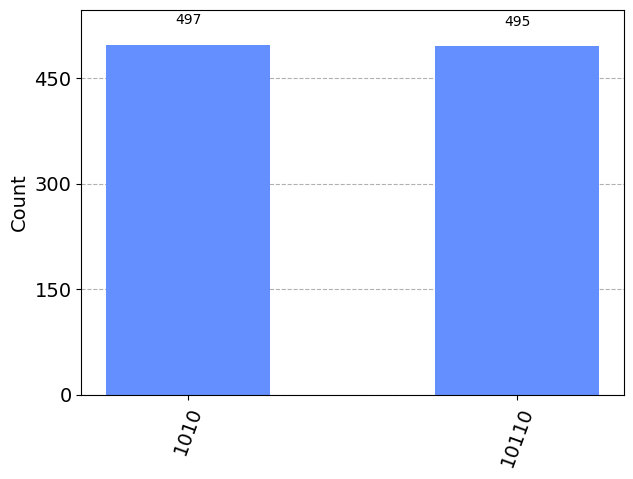

In [21]:
majority_counts = {k: v for k, v in counts.items() if  v>300 }
#print(projected_counts)
plot_histogram(majority_counts)

Convertimos a base decimal y extraemos sucesivamente
$$
x_i  ~~\longrightarrow ~~ a_i = \left[\frac{x_i}{2^t}\right] ~\approx ~\varphi_i ~~\longrightarrow ~~ M_i = [N \cos^2(\pi \varphi_i)]
$$

In [22]:
# la lista de m_i
xi_list = sorted([int(keys,2) for  keys in majority_counts]) 
print('{x_i} ~ ', xi_list)

# la lista de a_i
ai_list = [x/2**t for x in xi_list]

# la lista de M_i
Mi_list = [2**n*np.cos(np.pi*a)**2 for a in ai_list]
print('M_i=', Mi_list)

# redondeo de M_i al entero más próximo
rounded_Mi_list = [round(Mi) for Mi in Mi_list]
print(' M_i =', rounded_Mi_list)


{x_i} ~  [10, 22]
M_i= [4.938532541079283, 4.938532541079277]
 M_i = [5, 5]


Así hemos obtenido el número de soluciones, $M$, buscado, 

In [23]:
print('Number of solutions =', round(np.mean(rounded_Mi_list)))

Number of solutions = 5
